In [1]:
from pathlib import Path
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-1d003a0150ec>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
csx_csv = Path('Resources/stock_price_data/csx_prices.csv')
csx_prices = pd.read_csv(csx_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
csx_prices.head()
#Path.cwd()

,Close
Date,
1980-11-03 16:00:00,1.17
1980-11-05 16:00:00,1.18
1980-11-06 16:00:00,1.16
1980-11-07 16:00:00,1.15
1980-11-10 16:00:00,1.15


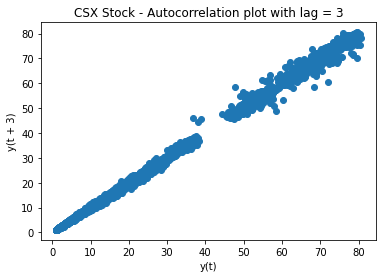

In [3]:
plt.figure()
lag_plot(csx_prices['Close'], lag=3)
plt.title('CSX Stock - Autocorrelation plot with lag = 3')
plt.show()

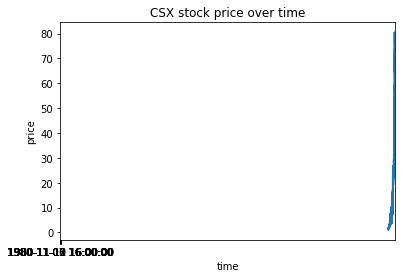

In [17]:
plt.plot(csx_prices["Close"])
plt.xticks(np.arange(0,1259, 200), csx_prices.index)
plt.title("CSX stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [8]:

#
train_data, test_data = csx_prices[0:int(len(csx_prices)*0.7)], csx_prices[int(len(csx_prices)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.6048651370697573


In [40]:
model_pred.to_csv("model_predictions")

AttributeError: 'list' object has no attribute 'to_csv'

AttributeError: 'DataFrame' object has no attribute 'Date'

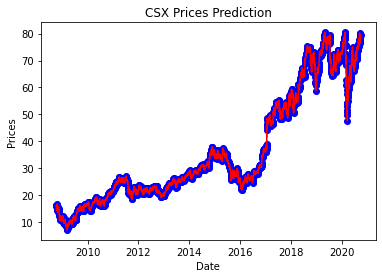

In [9]:
#CSX Price Predictions

csx_prices.loc["2014"].plot()
test_set_range = csx_prices[int(len(csx_prices)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('CSX Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), csx_prices.Date[881:1259:50])
plt.legend()
plt.show()

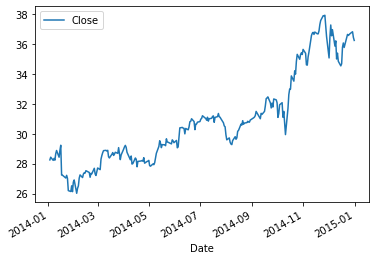

In [18]:
csx_prices.loc["2014"].plot()

In [30]:
model_pred.loc["2014"].plot()

AttributeError: 'list' object has no attribute 'loc'

In [39]:
print(test_data)

[15.9  15.91 15.33 ... 78.08 79.33 77.6 ]


In [38]:
predictions=pd.DataFrame({"predictions":model_pred}, index=test_data.index)
predictions.head()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [24]:
print(model_predictions)
model_pred=model_predictions.reshape(len(model_predictions))
print(model_pred)

[array([15.82535381]), array([16.11686182]), array([15.96405594]), array([15.36053302]), array([15.57607792]), array([14.9638768]), array([14.50950999]), array([16.64201289]), array([15.8582374]), array([14.38373162]), array([14.91446787]), array([14.41621124]), array([15.25995518]), array([14.92504888]), array([14.55805822]), array([14.62214062]), array([14.15041552]), array([13.64039058]), array([14.43308988]), array([14.36672655]), array([15.00681193]), array([15.13256921]), array([14.97257657]), array([15.61868396]), array([14.78543275]), array([14.34429249]), array([14.31986813]), array([14.48119893]), array([14.60943408]), array([13.85222963]), array([14.18982002]), array([12.95508958]), array([12.71375865]), array([12.06795692]), array([11.05215061]), array([10.73060355]), array([11.27589326]), array([11.61173841]), array([12.15377975]), array([12.40688624]), array([12.36042971]), array([11.26584058]), array([11.45794918]), array([11.51270253]), array([11.1208983]), array([11.42

AttributeError: 'list' object has no attribute 'reshape'

In [25]:
len(model_predictions)

3019

In [28]:
model_predictions.shape

AttributeError: 'list' object has no attribute 'shape'

In [29]:
model_pred=[x[0] for x in model_predictions]
print(model_pred)

[15.825353806800642, 16.116861818504155, 15.964055943676748, 15.360533018154626, 15.576077919375983, 14.963876803396467, 14.50950998757023, 16.642012889144073, 15.858237396195324, 14.38373162172416, 14.914467865731128, 14.41621124258615, 15.259955177597057, 14.925048878935419, 14.558058224484014, 14.622140624835383, 14.150415522722332, 13.64039057718012, 14.433089881617631, 14.366726545867362, 15.006811925335453, 15.132569209203648, 14.972576569837742, 15.618683959306033, 14.785432750287539, 14.344292494566169, 14.319868125171379, 14.481198934322345, 14.609434079089166, 13.85222963020417, 14.189820022042332, 12.955089584448835, 12.71375864914488, 12.06795691612864, 11.052150614844281, 10.730603549142723, 11.275893262926836, 11.611738409615022, 12.15377974932531, 12.406886243784362, 12.360429708011392, 11.265840578203262, 11.457949175881526, 11.512702532959864, 11.120898297588012, 11.420245065216392, 12.175642159514815, 11.310246022593837, 11.9423260786611, 11.311063216237773, 10.740183

In [31]:
model_pred.loc["2014"].plot()

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
predictions=pd.DataFrame({"predictions":model_predictions})

In [42]:
predictions.to_csv("model_predictions")